In [1]:
# ! pip install pandas seaborn matplotlib numpy scikit-learn pyod

## Importing Libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer

## Load Churn data

In [3]:
df = pd.read_csv('churn_data.csv')
df.tail()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,66,Yes,Two year,Bank transfer (automatic),105.65,6844.50,No


In [4]:
df.head()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes


## Filtering data

In [5]:
# Filtering based on Contract type
oneyr_contract_df = df[df['Contract'] == 'One year']
oneyr_contract_df


,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9,6388-TABGU,62,Yes,One year,Bank transfer (automatic),56.15,3487.95,No
12,8091-TTVAX,58,Yes,One year,Credit card (automatic),100.35,5681.10,No
16,8191-XWSZG,52,Yes,One year,Mailed check,20.65,1022.95,No
...,...,...,...,...,...,...,...,...
7022,7203-OYKCT,72,Yes,One year,Electronic check,104.95,7544.30,No
7031,3605-JISKB,55,Yes,One year,Credit card (automatic),60.00,3316.10,No
7036,7750-EYXWZ,12,No,One year,Electronic check,60.65,743.30,No
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No


In [6]:
# based on Payment Method
check_df = df[df['PaymentMethod'].str.contains('check')]
check_df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,8,Yes,Month-to-month,Electronic check,99.65,820.50,Yes
...,...,...,...,...,...,...,...,...
7032,6894-LFHLY,1,Yes,Month-to-month,Electronic check,75.75,75.75,Yes
7036,7750-EYXWZ,12,No,One year,Electronic check,60.65,743.30,No
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No


In [7]:
# based on Monthly Charges range
filtered_df = df[(df['MonthlyCharges'] >= 50) & (df['MonthlyCharges'] <= 100)]
filtered_df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,8,Yes,Month-to-month,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,22,Yes,Month-to-month,Credit card (automatic),89.10,1949.40,No
...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,38,Yes,Month-to-month,Credit card (automatic),69.50,2625.25,No
7035,8456-QDAVC,19,Yes,Month-to-month,Bank transfer (automatic),78.70,1495.10,No
7036,7750-EYXWZ,12,No,One year,Electronic check,60.65,743.30,No
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No


In [8]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

## Check for outliers

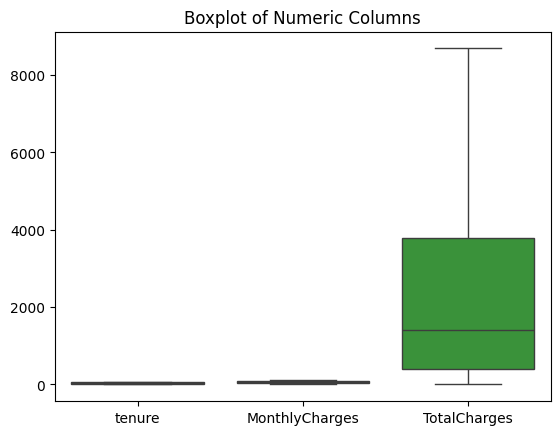

In [9]:
# Select numeric columns
numeric_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

sns.boxplot(data=df[numeric_columns])
plt.title("Boxplot of Numeric Columns")
plt.show()

In [10]:
column = 'TotalCharges'
q1 = df[column].quantile(0.25)
q3 = df[column].quantile(0.75)
iqr = q3 - q1
upper_boundary = q3 + 1.5 * iqr
lower_boundary = q1 - 1.5 * iqr
df[(df[column] < lower_boundary) | (df[column] > upper_boundary)][column]

df['TotalCharges']


0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

## Clipping outliers

In [11]:

df_copy = df.copy()
df_copy.loc[df[column] < lower_boundary, column] = np.nan
df_copy.loc[df[column] > upper_boundary, column] = np.nan

df_copy

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes


In [12]:

df_copy = df.copy()
df_copy[column].clip(lower=lower_boundary, upper=upper_boundary, inplace=True)

df_copy

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes


<Axes: >

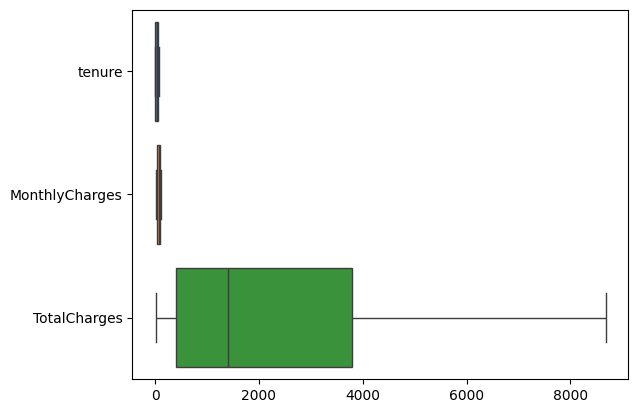

In [13]:

sns.boxplot(data=df_copy, orient='h')

## Check missing values

In [14]:
df_copy.isna().sum()

customerID         0
tenure             0
PhoneService       0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges      11
Churn              0
dtype: int64

## Fill rows with missing values

In [15]:
df_copy['TotalCharges'].fillna(df_copy['TotalCharges'].median(), inplace=True)

## Confirm no missing values

In [16]:
df_copy.isna().sum()

customerID        0
tenure            0
PhoneService      0
Contract          0
PaymentMethod     0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

## Converting Categorical variables to numeric

In [17]:
df_copy['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
df_copy['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [18]:
df_copy['PhoneService'] = df_copy['PhoneService'].replace({'No': 0, 'Yes': 1})
df_copy['PhoneService'].value_counts()

PhoneService
1    6361
0     682
Name: count, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      7043 non-null   object 
 1   tenure          7043 non-null   int64  
 2   PhoneService    7043 non-null   object 
 3   Contract        7043 non-null   object 
 4   PaymentMethod   7043 non-null   object 
 5   MonthlyCharges  7043 non-null   float64
 6   TotalCharges    7032 non-null   float64
 7   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


## Feature Engineering - combining features

In [20]:
# Log transform
df_copy['MonthlyCharges'] = np.log(df_copy['MonthlyCharges'])
df_copy

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,Month-to-month,Electronic check,3.396185,29.85,0
1,5575-GNVDE,34,1,One year,Mailed check,4.042174,1889.50,0
2,3668-QPYBK,2,1,Month-to-month,Mailed check,3.986202,108.15,1
3,7795-CFOCW,45,0,One year,Bank transfer (automatic),3.744787,1840.75,0
4,9237-HQITU,2,1,Month-to-month,Electronic check,4.258446,151.65,1
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,One year,Mailed check,4.440296,1990.50,0
7039,2234-XADUH,72,1,One year,Credit card (automatic),4.636669,7362.90,0
7040,4801-JZAZL,11,0,Month-to-month,Electronic check,3.387774,346.45,0
7041,8361-LTMKD,4,1,Month-to-month,Mailed check,4.309456,306.60,1


Text(0.5, 1.0, 'Histogram: MonthlyCharges log transformed')

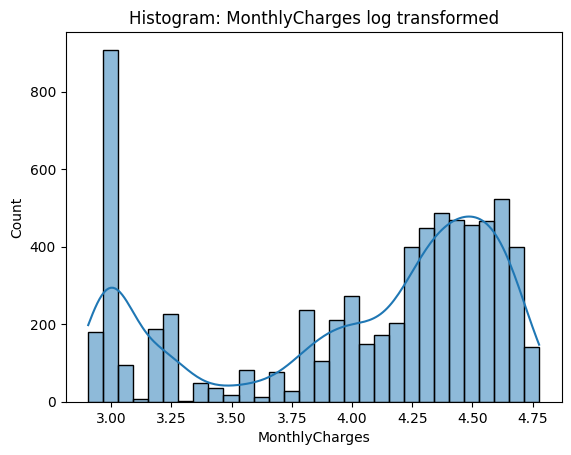

In [21]:

sns.histplot(df_copy['MonthlyCharges'], kde=True, bins=30)
plt.title("Histogram: MonthlyCharges log transformed")

## Ratio of MonthlyCharges to Tenure

In [22]:
df_copy['MonthlyCharges_Tenure_Ratio'] = df_copy['MonthlyCharges'] / df_copy['tenure']


## Plots for the new feature

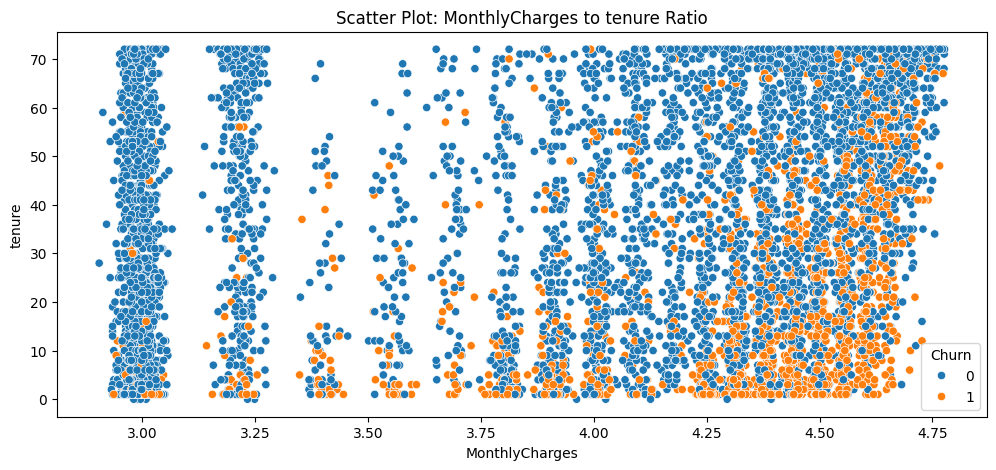

In [23]:

plt.figure(figsize=(12, 5))

sns.scatterplot(x='MonthlyCharges', y='tenure', hue='Churn', data=df_copy)
plt.title("Scatter Plot: MonthlyCharges to tenure Ratio")

plt.show()

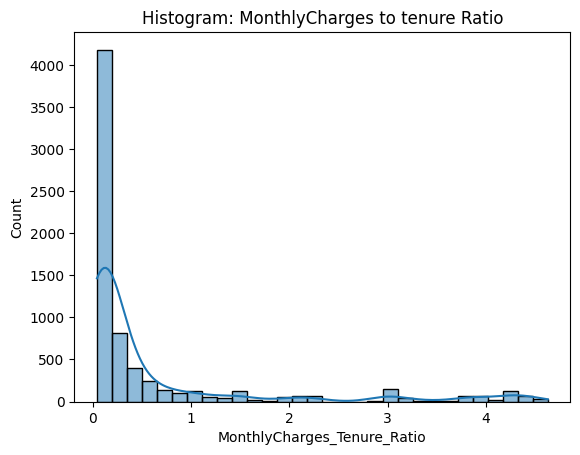

In [24]:

# plt.figure(figsize = (12,5))
sns.histplot(df_copy['MonthlyCharges_Tenure_Ratio'], kde=True, bins=30)
plt.title("Histogram: MonthlyCharges to tenure Ratio")

plt.show()

## Ratio of MonthlyCharges to TotalCharges

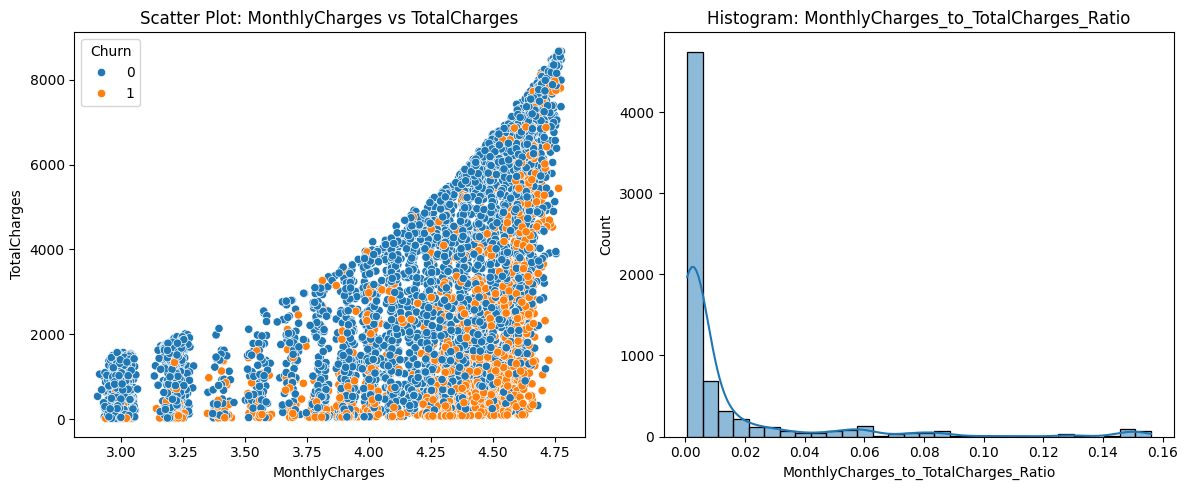

In [25]:
df_copy['MonthlyCharges_to_TotalCharges_Ratio'] = df_copy['MonthlyCharges'] / df_copy['TotalCharges']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
sns.histplot(df_copy['MonthlyCharges_to_TotalCharges_Ratio'], kde=True, bins=30)
plt.title("Histogram: MonthlyCharges_to_TotalCharges_Ratio")

plt.subplot(1, 2, 1)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df_copy)
plt.title("Scatter Plot: MonthlyCharges vs TotalCharges")

plt.tight_layout()
plt.show()

In [26]:
df_copy['customerID'] = range(1, len(df_copy) + 1)

## Save prepped data

In [27]:
df_copy.to_csv('prepped_churn_data.csv', index=False)

In [28]:
df_copy

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Tenure_Ratio,MonthlyCharges_to_TotalCharges_Ratio
0,1,1,0,Month-to-month,Electronic check,3.396185,29.85,0,3.396185,0.113775
1,2,34,1,One year,Mailed check,4.042174,1889.50,0,0.118887,0.002139
2,3,2,1,Month-to-month,Mailed check,3.986202,108.15,1,1.993101,0.036858
3,4,45,0,One year,Bank transfer (automatic),3.744787,1840.75,0,0.083217,0.002034
4,5,2,1,Month-to-month,Electronic check,4.258446,151.65,1,2.129223,0.028081
...,...,...,...,...,...,...,...,...,...,...
7038,7039,24,1,One year,Mailed check,4.440296,1990.50,0,0.185012,0.002231
7039,7040,72,1,One year,Credit card (automatic),4.636669,7362.90,0,0.064398,0.000630
7040,7041,11,0,Month-to-month,Electronic check,3.387774,346.45,0,0.307979,0.009779
7041,7042,4,1,Month-to-month,Mailed check,4.309456,306.60,1,1.077364,0.014056


# Advanced section

## Advanced Outlier detection

<Axes: >

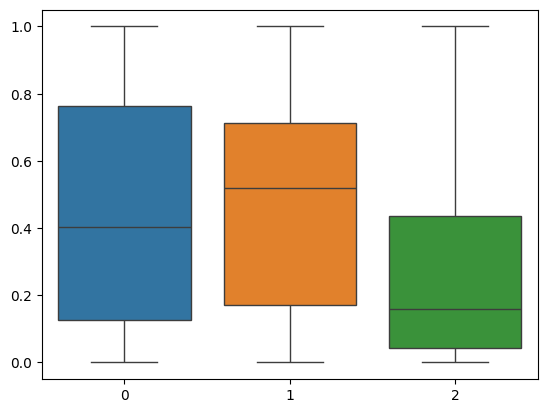

In [33]:
numeric_df = df.select_dtypes(exclude=['object'])

scaler = MinMaxScaler()
scaled_numeric = scaler.fit_transform(numeric_df)

sns.boxplot(data = scaled_numeric)

In [39]:
# We set contamination very low so we only get the most extreme values.
imputer = KNNImputer()
scaled_numeric_imputed = imputer.fit_transform(scaled_numeric)

od = IsolationForest(contamination=0.01)
od.fit(scaled_numeric_imputed)

outliers = od.predict(scaled_numeric_imputed)
outliers

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
outliers.sum()

df[outliers == -1]

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
62,0526-SXDJP,72,No,Two year,Bank transfer (automatic),42.10,2962.00,No
257,6655-LHBYW,50,Yes,One year,Credit card (automatic),114.35,5791.10,No
437,4376-KFVRS,72,Yes,Two year,Credit card (automatic),114.05,8468.20,No
464,1480-BKXGA,72,Yes,Two year,Bank transfer (automatic),116.05,8404.90,No
526,8606-CIQUL,72,Yes,Two year,Credit card (automatic),115.75,8399.15,No
...,...,...,...,...,...,...,...,...
6451,4868-AADLV,66,Yes,One year,Electronic check,116.25,7862.25,No
6537,1444-VVSGW,70,Yes,One year,Credit card (automatic),115.65,7968.85,Yes
6566,3795-CAWEX,70,Yes,Two year,Credit card (automatic),116.55,8152.30,No
6728,2380-DAMQP,72,Yes,Two year,Electronic check,115.15,8349.70,No


## Filling missing values with ML

In [41]:
df_missing = numeric_df.copy()
df_missing.loc[df['TotalCharges'] == 75, 'TotalCharges'] = np.nan
df_missing.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [42]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 165.2 KB


In [43]:
df_missing.isna().sum()

tenure             0
MonthlyCharges     0
TotalCharges      11
dtype: int64

In [44]:
imputer = KNNImputer()
filled_values = imputer.fit_transform(df_missing)
filled_df = pd.DataFrame(data=filled_values, columns=numeric_df.columns, index=numeric_df.index)

obj_df = df.select_dtypes(include=['object'])

## Merge dataframes

In [45]:
full_df = pd.concat([filled_df, obj_df], axis=1)
full_df.head()

,tenure,MonthlyCharges,TotalCharges,customerID,PhoneService,Contract,PaymentMethod,Churn
0,1.0,29.85,29.85,7590-VHVEG,No,Month-to-month,Electronic check,No
1,34.0,56.95,1889.50,5575-GNVDE,Yes,One year,Mailed check,No
2,2.0,53.85,108.15,3668-QPYBK,Yes,Month-to-month,Mailed check,Yes
3,45.0,42.30,1840.75,7795-CFOCW,No,One year,Bank transfer (automatic),No
4,2.0,70.70,151.65,9237-HQITU,Yes,Month-to-month,Electronic check,Yes


In [46]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   float64
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7043 non-null   float64
 3   customerID      7043 non-null   object 
 4   PhoneService    7043 non-null   object 
 5   Contract        7043 non-null   object 
 6   PaymentMethod   7043 non-null   object 
 7   Churn           7043 non-null   object 
dtypes: float64(3), object(5)
memory usage: 440.3+ KB


In [ ]:
full_df.isna().sum()

tenure                                  0
MonthlyCharges                          0
TotalCharges                            0
MonthlyCharges_to_TotalCharges_Ratio    0
customerID                              0
PhoneService                            0
Contract                                0
PaymentMethod                           0
Churn                                   0
dtype: int64

## One-hot encoding

In [ ]:
pd.get_dummies(df['Contract'])

,Month-to-month,One year,Two year
0,True,False,False
1,False,True,False
2,True,False,False
3,False,True,False
4,True,False,False
...,...,...,...
7038,False,True,False
7039,False,True,False
7040,True,False,False
7041,True,False,False


In [ ]:
pd.get_dummies(df['PaymentMethod'])

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,False,False,True,False
1,False,False,False,True
2,False,False,False,True
3,True,False,False,False
4,False,False,True,False
...,...,...,...,...
7038,False,False,False,True
7039,False,True,False,False
7040,False,False,True,False
7041,False,False,False,True


In [ ]:
# Combine with the original dataframe

one_hot_df = pd.concat([df.drop('PaymentMethod', axis=1), pd.get_dummies(df['PaymentMethod'], drop_first=True)],axis=1)

one_hot_df


,customerID,tenure,PhoneService,Contract,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_TotalCharges_Ratio,Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,1,No,Month-to-month,29.85,29.85,No,1.000000,False,True,False
1,5575-GNVDE,34,Yes,One year,56.95,1889.50,No,0.030140,False,False,True
2,3668-QPYBK,2,Yes,Month-to-month,53.85,108.15,Yes,0.497920,False,False,True
3,7795-CFOCW,45,No,One year,42.30,1840.75,No,0.022980,False,False,False
4,9237-HQITU,2,Yes,Month-to-month,70.70,151.65,Yes,0.466205,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,84.80,1990.50,No,0.042602,False,False,True
7039,2234-XADUH,72,Yes,One year,103.20,7362.90,No,0.014016,True,False,False
7040,4801-JZAZL,11,No,Month-to-month,29.60,346.45,No,0.085438,False,True,False
7041,8361-LTMKD,4,Yes,Month-to-month,74.40,306.60,Yes,0.242661,False,False,True


In [ ]:

one_hot_df_c = pd.concat([one_hot_df.drop('Contract', axis=1), pd.get_dummies(df['Contract'], drop_first=True)],axis=1)

one_hot_df_c

,customerID,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_TotalCharges_Ratio,Credit card (automatic),Electronic check,Mailed check,One year,Two year
0,7590-VHVEG,1,No,29.85,29.85,No,1.000000,False,True,False,False,False
1,5575-GNVDE,34,Yes,56.95,1889.50,No,0.030140,False,False,True,True,False
2,3668-QPYBK,2,Yes,53.85,108.15,Yes,0.497920,False,False,True,False,False
3,7795-CFOCW,45,No,42.30,1840.75,No,0.022980,False,False,False,True,False
4,9237-HQITU,2,Yes,70.70,151.65,Yes,0.466205,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,84.80,1990.50,No,0.042602,False,False,True,True,False
7039,2234-XADUH,72,Yes,103.20,7362.90,No,0.014016,True,False,False,True,False
7040,4801-JZAZL,11,No,29.60,346.45,No,0.085438,False,True,False,False,False
7041,8361-LTMKD,4,Yes,74.40,306.60,Yes,0.242661,False,False,True,False,False


## Yeo-Johnson transform

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>], dtype=object)

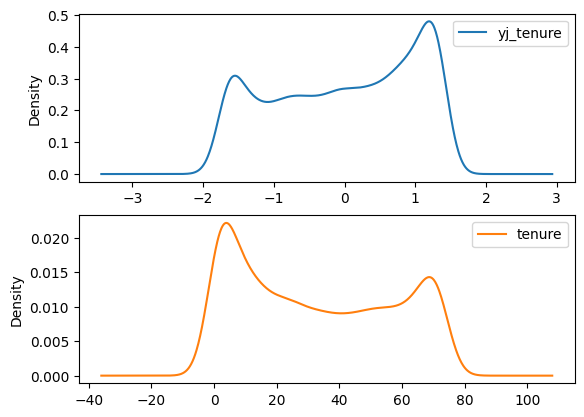

In [ ]:
pt = PowerTransformer()
df['yj_tenure'] = pt.fit_transform(df[['tenure']])
df[['yj_tenure', 'tenure']].plot.density(subplots=True, sharex=False)

## Summary

### Data Loading and Initial Exploration

Loaded the dataset using pd.read_csv('churn_data.csv').

Displayed the tail and head of the DataFrame to understand its structure.

### Data Filtering

Filtered the data based on Contract type ('One year') and stored it in oneyr_contract_df.

Filtered the data based on Payment Method containing check and stored it in check_df.

Filtered the data based on Monthly Charges range (between 50 and 100) and stored it in filtered_df.

### Data Exploration

Checked the distribution of PhoneService values using df['PhoneService'].value_counts().

### Boxplot for Numeric Columns

Selected numeric columns and created a boxplot using Seaborn.

### Outlier Detection and Handling

Detected outliers for the TotalCharges column using IQR.

Created a copy of the DataFrame and handled outliers by setting them as missing values or clipping.

### Handling Missing Values

Filled missing values using KNN imputation for numeric columns.

Replaced Churn values with binary encoding (0 for 'No' and 1 for 'Yes').

### Log Transformations

Applied a log transformation to the MonthlyCharges column.

Created a scatter plot for MonthlyCharges vs. tenure and a histogram for MonthlyCharges to tenure ratio.

### Feature Engineering

Created new features such as MonthlyCharges_to_TotalCharges_Ratio and MonthlyCharges_to_tenure_Ratio.

Generated visualizations, including scatter plots and histograms, for these new features.

### One-Hot Encoding

Used pd.get_dummies() to perform one-hot encoding on Contract and PaymentMethod.

Combined the one-hot encoded columns with the original DataFrame.

### Power Transformation

Applied a Yeo-Johnson power transformation to the tenure column and visualized the transformation using density plots.

### Saving the Preprocessed Data

Changed the customerID column to normal numbering.

Saved the preprocessed data to a CSV file using df_copy.to_csv('prepped_churn_data.csv', index=False).

### Scaling Data and Outlier Detection with Isolation Forest

Scaled numeric columns using Min-Max scaling.
Detected outliers using Isolation Forest.

### Imputing Missing Values with KNN

Created a dataset with missing values for demonstration.
Imputed missing values using KNN imputation.

### Handling Categorical Data

Encoded categorical columns using one-hot encoding.

### Power Transformation with PowerTransformer

Applied a power transformation using PowerTransformer to the tenure column and visualized the transformation.